# 🐼 Pandas Project Roadmap: Snitch Fashion Sales Dataset

A full breakdown of pandas skills, concepts, and hands-on analysis questions to practice.

---

## 📋 Summary Table

| Pandas Skill             | Questions Covered |
| ------------------------ | ----------------- |
| Data Inspection          | Q1–Q5             |
| Data Cleaning            | Q6–Q10            |
| Grouping & Aggregation   | Q11–Q15           |
| Time Series Analysis     | Q16–Q19           |
| Derived Columns          | Q20–Q22           |
| Filtering & Conditions   | Q23–Q25           |
| Visualization (Optional) | Q26–Q28           |

---

## 🧩 1. Data Inspection & Exploration

### 📚 Concepts:
- `df.shape`, `df.columns`, `df.dtypes`
- `df.head()`, `df.tail()`, `df.describe()`, `df.info()`
- `df.isnull().sum()`, `df.duplicated()`

### 🔍 Questions:
1. How many rows and columns are in the dataset?  
2. What are the column names and their data types?  
3. How many missing values are there in each column?  
4. Are there duplicate records?  
5. View the first and last 10 rows of the data.  

---

## 🧹 2. Data Cleaning & Preprocessing

### 📚 Concepts:
- `df.dropna()`, `df.fillna()`, `df.replace()`, `df.duplicated()`
- `df['col'].str.lower()`, `pd.to_datetime()`, `df['col'].astype()`
- Handling inconsistent formatting (e.g. city names)

### 🧽 Questions:
6. Normalize inconsistent city names (e.g. "bengaluru", "Bangalore", "hyd", "Hyderabad").  
7. Convert the `Order_Date` column to datetime format.  
8. Fill missing `Units_Sold` using `Sales_Amount / Unit_Price` when possible.  
9. Create a new column: `Net_Price = Unit_Price × (1 - Discount_%)`  
10. Fill missing `Segment` with the most common value.  

---

## 📊 3. Aggregation & Grouping

### 📚 Concepts:
- `df.groupby()`, `.agg()`, `.sum()`, `.mean()`, `.count()`
- `.sort_values()`
- `df['col'].value_counts()`

### 📈 Questions:
11. How many orders were placed per product category?  
12. What is the total profit per city?  
13. What is the average unit price per product category?  
14. Who are the top 5 customers by total profit?  
15. What are the top-selling products by `Units_Sold`?  

---

## 📆 4. Time Series Analysis

### 📚 Concepts:
- `pd.to_datetime()`
- `df['Order_Date'].dt.month`, `.dt.year`, `.dt.day_name()`
- `df.set_index('Order_Date').resample('M')`

### 📅 Questions:
16. What is the trend of sales over months?  
17. Which month has the highest number of orders?  
18. Is there seasonality in product categories?  
19. What is the average monthly sales amount?  

---

## 💡 5. Derived Columns & Calculated Fields

### 📚 Concepts:
- Creating columns: `df['New_Column'] = ...`
- Row-wise operations: `axis=1`, `.apply()`, `.round(2)`

### 💰 Questions:
20. Compute profit margin per order: `(Profit / Sales_Amount) × 100`  
21. Compute total revenue without discount and compare it with discounted sales.  
22. Which product has the highest return per unit (`Profit / Units_Sold`)?  

---

## 📐 6. Filtering & Conditional Logic

### 📚 Concepts:
- Boolean indexing: `df[df['col'] > value]`
- Multiple conditions: `&`, `|`
- `.query()` method

### 🧠 Questions:
23. Which orders had `Units_Sold = 0` or missing?  
24. Which products had high sales but negative profits?  
25. Which products had discounts over 50%?  

---

## 📊 7. Visualization (Optional using Matplotlib/Seaborn)

### 📚 Concepts:
- Bar plots, line plots: `.plot(kind='bar')`, `.plot(kind='line')`
- Distribution plots: `sns.histplot()`, `sns.boxplot()`

### 📉 Questions:
26. Visualize top 5 product categories by profit.  
27. Plot monthly sales over time.  
28. Show distribution of unit prices.  


In [1]:
import pandas as pd

In [2]:
data = pd.read_csv(r'data\Snitch_Fashion_Sales_Uncleaned.csv')

## 1] How many rows and columns are in the dataset?

In [3]:
# total rows
print(data.shape[0])
# total columns
print(data.shape[1])

2500
12


## 2] What are the column names and their data types?

In [4]:
# column names
data.columns

Index(['Order_ID', 'Customer_Name', 'Product_Category', 'Product_Name',
       'Units_Sold', 'Unit_Price', 'Discount_%', 'Sales_Amount', 'Order_Date',
       'City', 'Segment', 'Profit'],
      dtype='object')

In [5]:
data.dtypes

Order_ID              int64
Customer_Name        object
Product_Category     object
Product_Name         object
Units_Sold          float64
Unit_Price          float64
Discount_%          float64
Sales_Amount        float64
Order_Date           object
City                 object
Segment              object
Profit              float64
dtype: object

## 3] How many missing values are there in each column?

In [6]:
data.isnull().sum(axis=0)

Order_ID               0
Customer_Name          0
Product_Category       0
Product_Name           0
Units_Sold          1306
Unit_Price          1210
Discount_%          1651
Sales_Amount           0
Order_Date           606
City                   0
Segment              821
Profit                 0
dtype: int64

## 4] Are there duplicate records?

In [7]:
duplicate_count = data.duplicated().sum()
if duplicate_count:
    print("Yes")
else:
    print("No")

No


## 5] View the first and last 10 rows of the data.

In [8]:
df_first_10  = data.head(10)
df_last_10 = data.tail(10)
print(df_first_10 )
print(df_last_10)

   Order_ID         Customer_Name Product_Category       Product_Name  \
0      1000        Brian Thompson            Jeans     Slim Fit Jeans   
1      1001            Shaun Ross            Jeans     Slim Fit Jeans   
2      1002          Sarah Snyder          Jackets        Puffer Coat   
3      1003            Jay Briggs            Shoes            Loafers   
4      1004           Maria Blake      Accessories              Belts   
5      1005         Samuel Miller         T-Shirts           Crop Top   
6      1006           John Mclean            Jeans    Boyfriend Jeans   
7      1007  Dr. Kathryn Bass PhD          Dresses        Casual Midi   
8      1008          Marie Fisher      Accessories         Sunglasses   
9      1009            Dale Perry         T-Shirts  Oversized T-shirt   

   Units_Sold  Unit_Price  Discount_%  Sales_Amount  Order_Date       City  \
0         NaN      842.00        0.60          0.00  2025-02-27      Delhi   
1         1.0         NaN         NaN   

## 6] Normalize inconsistent city names (e.g. "bengaluru", "Bangalore", "hyd", "Hyderabad").

In [9]:
data.columns

Index(['Order_ID', 'Customer_Name', 'Product_Category', 'Product_Name',
       'Units_Sold', 'Unit_Price', 'Discount_%', 'Sales_Amount', 'Order_Date',
       'City', 'Segment', 'Profit'],
      dtype='object')

In [10]:
# data['City'].unique()
# data['City'].replace('bengaluru',"Bangalore", inplace=True)
# data['City'].replace('Hyd',"Hyderabad", inplace=True)
# data['City'].replace('hyderbad',"Hyderabad", inplace=True)
# data['City'].unique()

data['City'] = data['City'].replace({"bengaluru":"Bangalore", "Hyd":"Hyderabad", "hyderbad":"Hyderabad"})
data['City'].unique()

array(['Delhi', 'Ahmedabad', 'Mumbai', 'Bangalore', 'Hyderabad', 'Pune'],
      dtype=object)

## 7] Convert the Order_Date column to datetime format.

In [11]:
data.columns
# Convert 'Order_Date' to datetime format, handling NaN and invalid formats
data['Order_Date'] = pd.to_datetime(data['Order_Date'], errors="coerce") # errors='coerce' ensures that invalid or missing values are set to NaT (Pandas' version of NaN for datetime).
data['Order_Date']

0      2025-02-27
1      2025-07-15
2             NaT
3             NaT
4             NaT
          ...    
2495          NaT
2496   2024-03-10
2497          NaT
2498          NaT
2499          NaT
Name: Order_Date, Length: 2500, dtype: datetime64[ns]

## 8] ?Fill missing Units_Sold using Sales_Amount / Unit_Price when possible.

In [12]:
data.columns

Index(['Order_ID', 'Customer_Name', 'Product_Category', 'Product_Name',
       'Units_Sold', 'Unit_Price', 'Discount_%', 'Sales_Amount', 'Order_Date',
       'City', 'Segment', 'Profit'],
      dtype='object')

In [13]:
data['Units_Sold'] = data['Units_Sold'].fillna(data['Sales_Amount']/ data['Unit_Price'])
data['Units_Sold']

0       0.0
1       1.0
2       1.0
3       2.0
4       1.0
       ... 
2495    0.0
2496    4.0
2497    0.0
2498    5.0
2499    6.0
Name: Units_Sold, Length: 2500, dtype: float64

## 9] Create a new column: Net_Price = Unit_Price × (1 - Discount_%)

In [14]:
data.columns

Index(['Order_ID', 'Customer_Name', 'Product_Category', 'Product_Name',
       'Units_Sold', 'Unit_Price', 'Discount_%', 'Sales_Amount', 'Order_Date',
       'City', 'Segment', 'Profit'],
      dtype='object')

In [15]:
data['Net_Price'] = data['Unit_Price'] * (1 - data['Discount_%'])
data.head()

,Order_ID,Customer_Name,Product_Category,Product_Name,Units_Sold,Unit_Price,Discount_%,Sales_Amount,Order_Date,City,Segment,Profit,Net_Price
0,1000,Brian Thompson,Jeans,Slim Fit Jeans,0.0,842.00,0.60,0.00,2025-02-27,Delhi,B2C,2137.45,336.8000
1,1001,Shaun Ross,Jeans,Slim Fit Jeans,1.0,NaN,NaN,0.00,2025-07-15,Ahmedabad,NaN,1588.15,NaN
2,1002,Sarah Snyder,Jackets,Puffer Coat,1.0,637.82,NaN,0.00,NaT,Mumbai,B2B,-158.03,NaN
3,1003,Jay Briggs,Shoes,Loafers,2.0,2962.27,NaN,0.00,NaT,Bangalore,B2B,2296.50,NaN
4,1004,Maria Blake,Accessories,Belts,1.0,2881.07,0.27,2103.18,NaT,Hyderabad,NaN,63.66,2103.1811


## 10] Fill missing Segment with the most common value.

In [16]:
data.columns

Index(['Order_ID', 'Customer_Name', 'Product_Category', 'Product_Name',
       'Units_Sold', 'Unit_Price', 'Discount_%', 'Sales_Amount', 'Order_Date',
       'City', 'Segment', 'Profit', 'Net_Price'],
      dtype='object')

In [17]:
data['Segment'].unique()

array(['B2C', nan, 'B2B'], dtype=object)

In [18]:
data['Segment'].value_counts()
data['Segment'].fillna(data['Segment'].mode()[0], inplace=True)
print(data['Segment'].isna().sum())

0


C:\Users\admin\AppData\Local\Temp\ipykernel_15608\2803798117.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Segment'].fillna(data['Segment'].mode()[0], inplace=True)


## 11] How many orders were placed per product category?

In [19]:
data.columns

Index(['Order_ID', 'Customer_Name', 'Product_Category', 'Product_Name',
       'Units_Sold', 'Unit_Price', 'Discount_%', 'Sales_Amount', 'Order_Date',
       'City', 'Segment', 'Profit', 'Net_Price'],
      dtype='object')

In [20]:
data.groupby(by="Product_Category").size()

Product_Category
Accessories    411
Dresses        443
Jackets        411
Jeans          410
Shoes          410
T-Shirts       415
dtype: int64

## 12] What is the total profit per city?

In [21]:
data['City'] = data['City'].replace({"bengaluru":"Bangalore", "Hyd":"Hyderabad", "hyderbad":"Hyderabad"})
data.groupby(by='City')['Profit'].sum()

City
Ahmedabad    392920.24
Bangalore    413978.94
Delhi        369016.85
Hyderabad    418256.67
Mumbai       458368.27
Pune         401381.61
Name: Profit, dtype: float64

## 13] What is the average unit price per product category?

In [22]:
data.groupby(by='Product_Category')['Unit_Price'].mean()

Product_Category
Accessories    2637.581532
Dresses        2886.981591
Jackets        2647.082750
Jeans          2656.844249
Shoes          2615.475498
T-Shirts       2702.487206
Name: Unit_Price, dtype: float64

## 14] Who are the top 5 customers by total profit?

In [23]:
total_profit_per_customer = data.groupby(by='Customer_Name')['Profit'].sum()
total_profit_per_customer.sort_values(ascending=False)[:5]

Customer_Name
Renee Martinez    5171.44
Angela Hall       4740.72
Samuel Miller     4260.18
Jeffrey Haynes    4002.59
Jacob Morris      3753.17
Name: Profit, dtype: float64

## 15] What are the top-selling products by Units_Sold?

In [24]:
product_sold = data.groupby(by='Product_Name')['Units_Sold'].sum()
product_sold.sort_values(ascending=False).head(1)

Product_Name
Classic Tee    127.0
Name: Units_Sold, dtype: float64

## 16] What is the trend of sales over months?

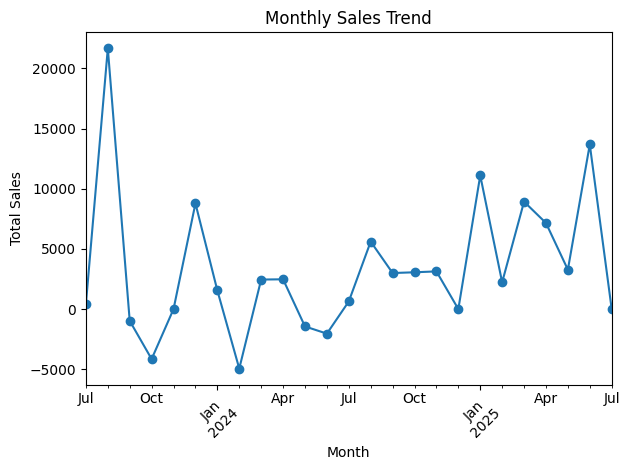

In [29]:
data['Order_Date'] = pd.to_datetime(data['Order_Date'], errors="coerce")
data['Month'] = data['Order_Date'].dt.to_period('M')
monthly_sales = data.groupby(by='Month')['Sales_Amount'].sum()

import matplotlib.pyplot as plt

monthly_sales.plot(kind='line', marker='o', title='Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 17] Which month has the highest number of orders?

In [36]:
monthly_sales = data.groupby(by='Month').size()
monthly_sales.sort_values(ascending=False).head(1)

Month
2023-12    36
Freq: M, dtype: int64

## 18] Is there seasonality in product categories?

## 19] What is the average monthly sales amount?

In [39]:
monthly_sales_avg = data.groupby(by='Month')['Sales_Amount'].sum()
monthly_sales_avg

Month
2023-07      415.81
2023-08    21662.35
2023-09     -975.67
2023-10    -4150.30
2023-11        0.00
2023-12     8779.63
2024-01     1550.05
2024-02    -4943.11
2024-03     2455.13
2024-04     2475.73
2024-05    -1439.96
2024-06    -2038.38
2024-07      636.29
2024-08     5608.23
2024-09     2996.31
2024-10     3058.67
2024-11     3132.74
2024-12        0.00
2025-01    11101.09
2025-02     2228.06
2025-03     8925.57
2025-04     7153.87
2025-05     3274.13
2025-06    13675.73
2025-07        0.00
Freq: M, Name: Sales_Amount, dtype: float64